In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv(r"cleaned_data.csv")

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# OUTLIERS

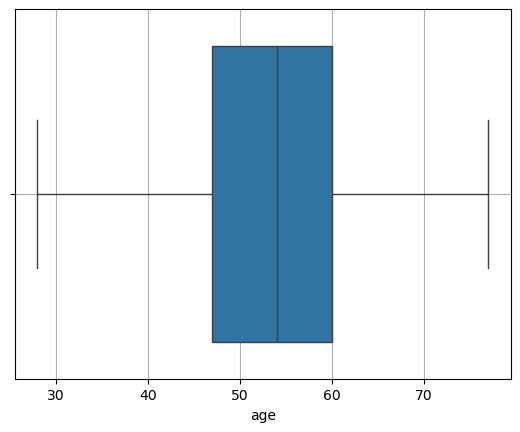

In [4]:
sns.boxplot(x=df['age'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [5]:
df.age.isnull().sum()

0

In [6]:
df.sort_values('trestbps')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
644,645,53,Male,Switzerland,asymptomatic,80.0,NaN,NaN,normal,141.0,True,2.0,downsloping,NaN,NaN,0
499,500,38,Male,Hungary,asymptomatic,92.0,117.0,False,normal,134.0,True,2.5,flat,NaN,NaN,1
131,132,51,Male,Cleveland,non-anginal,94.0,227.0,False,normal,154.0,True,0.0,upsloping,1.0,reversable defect,0
222,223,39,Female,Cleveland,non-anginal,94.0,199.0,False,normal,179.0,False,0.0,upsloping,0.0,normal,0
665,666,57,Male,Switzerland,asymptomatic,95.0,NaN,NaN,normal,182.0,False,0.7,downsloping,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,63,Male,VA Long Beach,atypical angina,NaN,165.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
901,902,55,Male,VA Long Beach,non-anginal,NaN,NaN,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
905,906,61,Male,VA Long Beach,non-anginal,NaN,284.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


## Trestbps

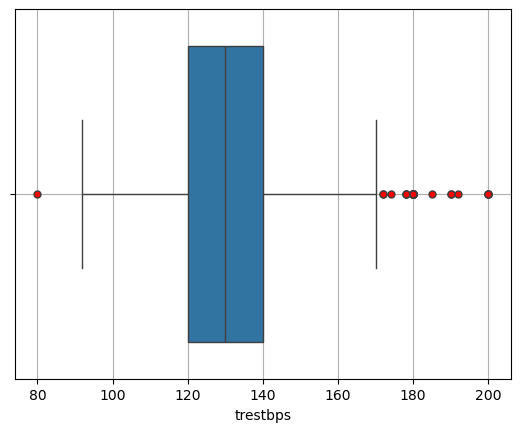

In [7]:
sns.boxplot(x=df['trestbps'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [8]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers = df[(df['trestbps'] < lower_whisker) | (df['trestbps'] > upper_whisker)]
outliers.sort_values('trestbps')



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
644,645,53,Male,Switzerland,asymptomatic,80.0,NaN,NaN,normal,141.0,True,2.0,downsloping,NaN,NaN,0
14,15,52,Male,Cleveland,non-anginal,172.0,199.0,True,normal,162.0,False,0.5,upsloping,0.0,reversable defect,0
854,855,55,Male,VA Long Beach,asymptomatic,172.0,260.0,False,normal,73.0,False,2.0,NaN,NaN,NaN,1
172,173,59,Female,Cleveland,asymptomatic,174.0,249.0,False,normal,143.0,True,0.0,flat,0.0,normal,1
779,780,59,Male,VA Long Beach,asymptomatic,178.0,NaN,True,lv hypertrophy,120.0,True,0.0,NaN,NaN,reversable defect,1
183,184,59,Male,Cleveland,typical angina,178.0,270.0,False,lv hypertrophy,145.0,False,4.2,downsloping,0.0,reversable defect,0
213,214,66,Female,Cleveland,asymptomatic,178.0,228.0,True,normal,165.0,True,1.0,flat,2.0,reversable defect,1
727,728,60,Male,VA Long Beach,non-anginal,180.0,NaN,False,st-t abnormality,140.0,True,1.5,flat,NaN,NaN,0
647,648,54,Male,Switzerland,asymptomatic,180.0,NaN,NaN,normal,150.0,False,1.5,flat,NaN,reversable defect,1
595,596,58,Female,Hungary,atypical angina,180.0,393.0,False,normal,110.0,True,1.0,flat,NaN,reversable defect,1


In [9]:
df.trestbps.isnull().sum()


60

In [10]:
df_capped = df.copy() # Create a backup of data

In [11]:
df_capped.loc[df_capped['trestbps'] == 80 ,'trestbps'] = 92


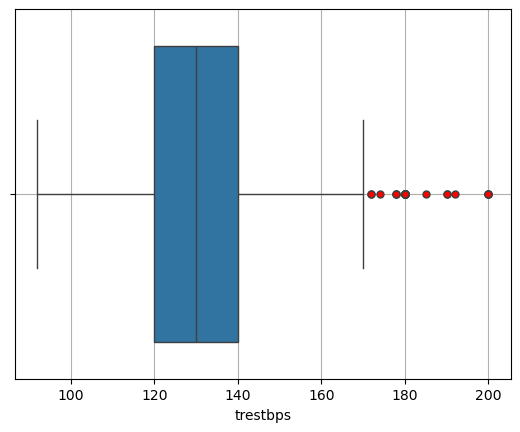

In [12]:
sns.boxplot(x=df_capped['trestbps'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [13]:
df['trestbps'].skew()

0.6301589151153714

## chol

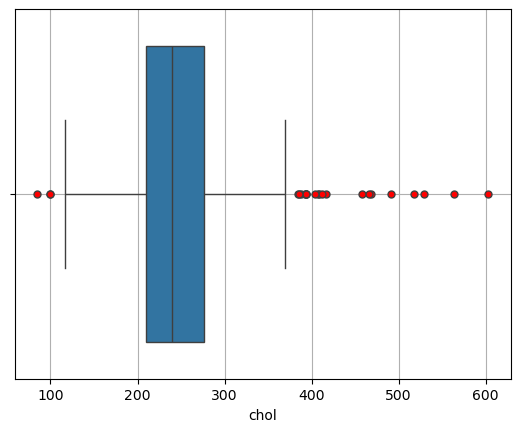

In [14]:
sns.boxplot(x=df['chol'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [15]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers = df[(df['chol'] < lower_whisker) | (df['chol'] > upper_whisker)]
outliers.sort_values('chol').drop(columns = ['id','dataset'])



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
473,56,Male,asymptomatic,120.0,85.0,False,normal,140.0,False,0.0,NaN,NaN,NaN,0
748,56,Male,asymptomatic,120.0,100.0,False,normal,120.0,True,1.5,flat,0.0,reversable defect,1
431,52,Male,atypical angina,140.0,100.0,False,normal,138.0,True,0.0,NaN,NaN,NaN,0
802,67,Male,asymptomatic,160.0,384.0,True,st-t abnormality,130.0,True,0.0,flat,NaN,NaN,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
576,56,Male,asymptomatic,170.0,388.0,False,st-t abnormality,122.0,True,2.0,flat,NaN,NaN,1
531,40,Female,asymptomatic,150.0,392.0,False,normal,130.0,False,2.0,flat,NaN,fixed defect,1
595,58,Female,atypical angina,180.0,393.0,False,normal,110.0,True,1.0,flat,NaN,reversable defect,1
173,62,Female,asymptomatic,140.0,394.0,False,lv hypertrophy,157.0,False,1.2,flat,0.0,normal,0
461,55,Female,atypical angina,130.0,394.0,False,lv hypertrophy,150.0,False,0.0,NaN,NaN,NaN,0


In [16]:

ranges = {
    'Below 100': df[df['chol'] < 100].shape[0],
    '100-199': df[(df['chol'] >= 100) & (df['chol'] < 200)].shape[0],
    '200-299': df[(df['chol'] >= 200) & (df['chol'] < 300)].shape[0],
    '300-399': df[(df['chol'] >= 300) & (df['chol'] < 400)].shape[0],
    '400-499': df[(df['chol'] >= 400) & (df['chol'] < 500)].shape[0],
    '500+': df[df['chol'] >= 500].shape[0],
}

for k, v in ranges.items():
    print(f"{k}: {v} values")


Below 100: 1 values
100-199: 127 values
200-299: 485 values
300-399: 92 values
400-499: 9 values
500+: 4 values


In [17]:
chol_1 = df['chol'].quantile(0.1)
chol_1

184.0

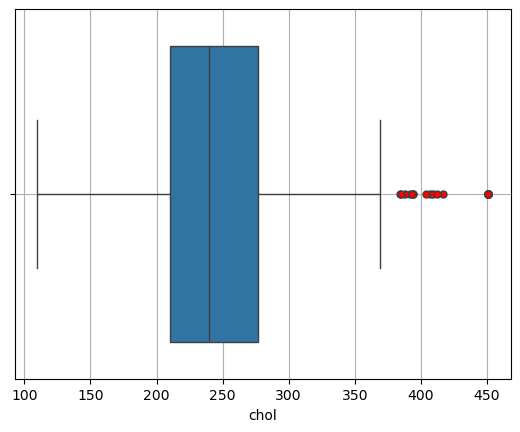

In [18]:

chol_99 = df['chol'].quantile(0.99)

#  Apply capping to the new dataset only
df_capped['chol'] = df_capped['chol'].apply(lambda x: chol_99 if x > chol_99 else x)
df_capped['chol'] = df_capped['chol'].apply(lambda x:   lower_whisker if x < lower_whisker else x)
sns.boxplot(x=df_capped['chol'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

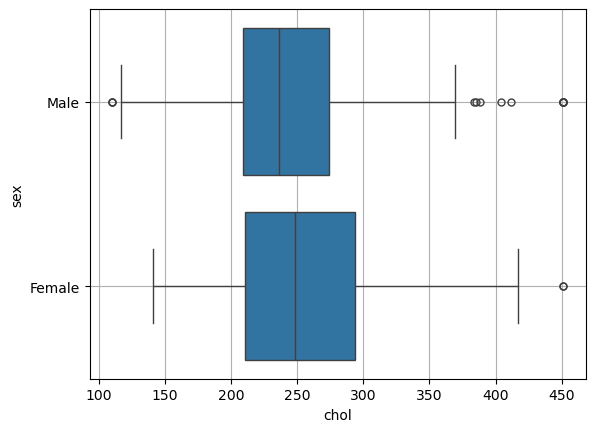

In [19]:
sns.boxplot(x='chol', y='sex', data=df_capped, fliersize=5)
plt.grid()


Text(0.5, 1.0, 'KDE Comparison: Original vs Capped chol')

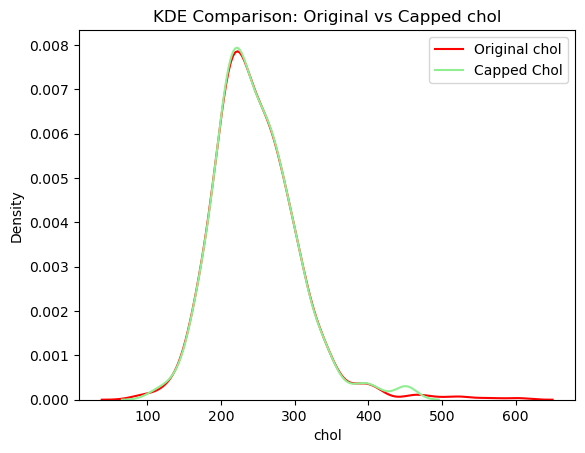

In [20]:
sns.kdeplot(df['chol'], label='Original chol', color='red')
sns.kdeplot(df_capped['chol'], label='Capped Chol', color='lightgreen')

plt.legend()
plt.xlabel('chol')
plt.ylabel('Density')
plt.title('KDE Comparison: Original vs Capped chol')

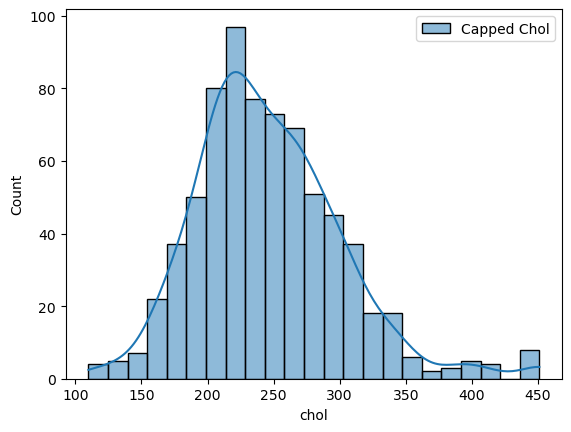

In [21]:
sns.histplot(df_capped['chol'],kde = True,label = 'Capped Chol')
plt.legend()

In [22]:
print("Capped Data Mean :" ,df_capped['chol'].mean())
print("Capped Data Median:" ,df_capped['chol'].median())
print("Original Data Mean :" ,df['chol'].mean())
print("Original Data Median :" ,df['chol'].median())

Capped Data Mean : 246.2142966573816
Capped Data Median: 239.5
Original Data Mean : 246.83286908077994
Original Data Median : 239.5


In [23]:
df_capped['chol'].skew()

0.8153610724349426

# Thalch

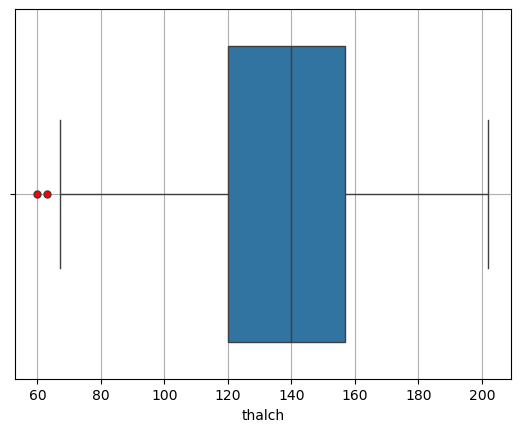

In [24]:
sns.boxplot(x=df['thalch'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [25]:
Q1 = df['thalch'].quantile(0.25)
Q3 = df['thalch'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers = df[(df['thalch'] < lower_whisker) | (df['thalch'] > upper_whisker)]
outliers.sort_values('thalch').drop(columns = ['id','dataset'])



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
631,51,Male,asymptomatic,140.0,NaN,False,normal,60.0,False,0.0,flat,NaN,normal,1
677,60,Male,asymptomatic,135.0,NaN,False,normal,63.0,True,0.5,upsloping,NaN,reversable defect,1


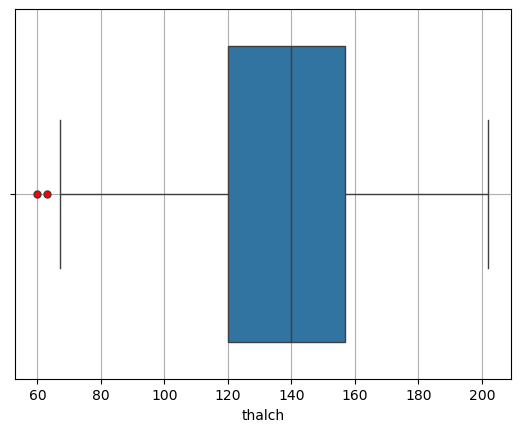

In [26]:
sns.boxplot(x=df_capped['thalch'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [27]:
thalch_1 = df['thalch'].quantile(0.01)
df_capped['thalch'] = df['thalch'].apply(lambda x: thalch_1 if x < thalch_1 else x)

Text(0.5, 1.0, 'KDE Comparison: Original vs Capped thalch')

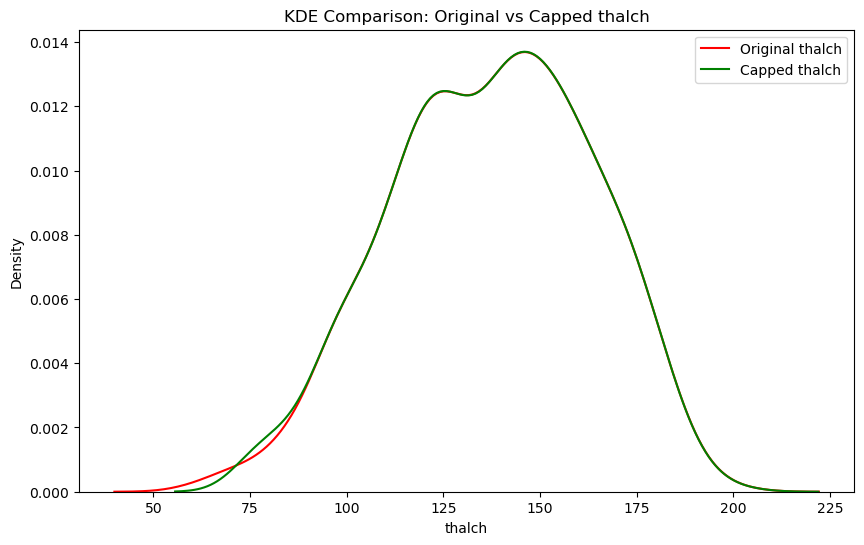

In [28]:
plt.figure(figsize=(10, 6))

# KDE plots with labels
sns.kdeplot(df['thalch'], label='Original thalch', color='red')
sns.kdeplot(df_capped['thalch'], label='Capped thalch', color='green')

# Add legend and labels
plt.legend()
plt.xlabel('thalch')
plt.ylabel('Density')
plt.title('KDE Comparison: Original vs Capped thalch')

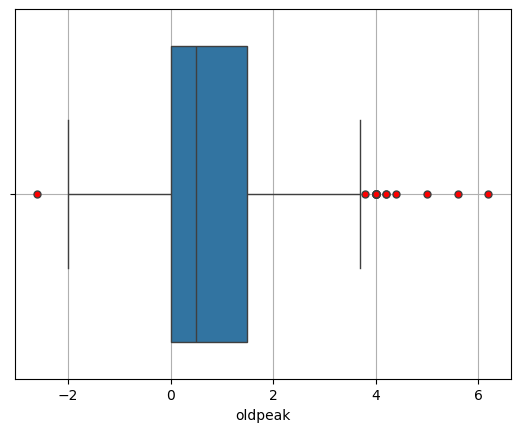

In [29]:
sns.boxplot(x=df['oldpeak'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [31]:
df.oldpeak.isnull().sum()

62

In [32]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

q1 = df_capped['oldpeak'].quantile(0.01)
q99 = df_capped['oldpeak'].quantile(0.99)
# Step 3: Filter outliers
outliers = df[(df['oldpeak'] < lower_whisker) | (df['oldpeak'] > upper_whisker)]
outliers.sort_values('oldpeak').drop(columns = ['id','dataset'])
df_capped['oldpeak'] = df_capped['oldpeak'].clip(lower=q1, upper=q99)

# Show the result
df_capped['oldpeak'].describe()


count    858.000000
mean       0.879634
std        1.053254
min       -0.586000
25%        0.000000
50%        0.500000
75%        1.500000
max        4.000000
Name: oldpeak, dtype: float64

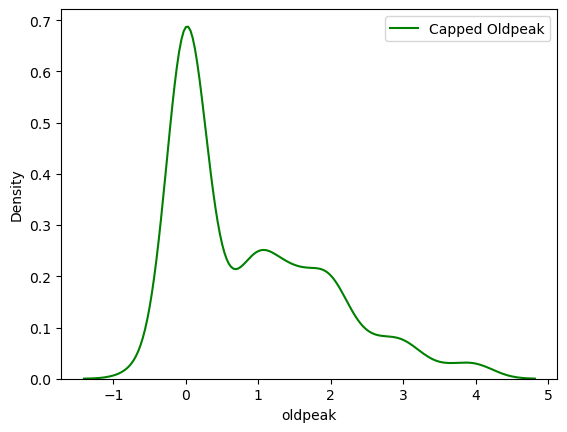

In [45]:
sns.kdeplot(df['oldpeak'],label = "Orginal Oldpeak",color = "Red")
sns.kdeplot(df_capped['oldpeak'] , label = "Capped Oldpeak",color = "Green")
plt.legend()


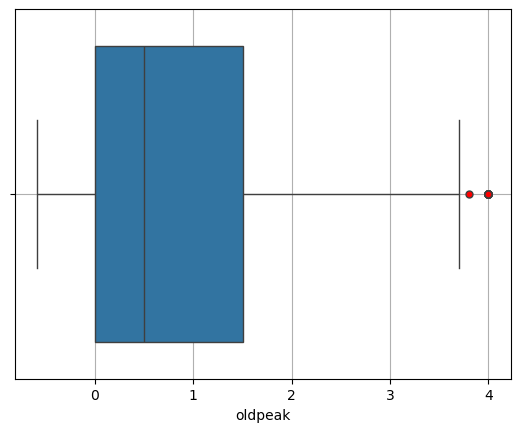

In [34]:
sns.boxplot(x=df_capped['oldpeak'],fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.grid()

In [35]:
print("Capped Data Mean :" ,round(df_capped['oldpeak'].mean(),2))
print("Capped Data Median:" ,df_capped['oldpeak'].median())
print("Original Data Mean :" ,round(df['oldpeak'].mean(),2))
print("Original Data Median :" ,df['oldpeak'].median())

Capped Data Mean : 0.88
Capped Data Median: 0.5
Original Data Mean : 0.88
Original Data Median : 0.5


In [39]:
df['oldpeak'].skew()

0.9816329604816705

In [37]:
df_capped['oldpeak'].skew()

0.9816329604816705

In [42]:
# Save the capped dataset to CSV
df_capped.to_csv("heart_cleaned.csv", index=False)


In [44]:
df_capped.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.300000,246.214297,137.618543,0.879634,0.676375,0.553261
std,265.725422,9.424685,18.501254,55.323639,25.737657,1.053254,0.935653,0.497426
min,1.000000,28.000000,92.000000,109.875000,75.560000,-0.586000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,451.030000,202.000000,4.000000,3.000000,1.000000
